# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

/var/folders/12/qy4gn7r12t5295wlxsddpx600000gp/T/ipykernel_60940/1699348528.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [98]:
df = pd.read_csv('data/pda/fiducial_markers_data.csv')
v_arr = np.load('data/pda/volume_array.npy')
full_path = np.load('data/pda/full_path.npy')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  33 non-null     int64  
 1   label       33 non-null     object 
 2   artery      33 non-null     object 
 3   R           33 non-null     float64
 4   A           33 non-null     float64
 5   S           33 non-null     float64
 6   k           33 non-null     int64  
 7   j           33 non-null     int64  
 8   i           33 non-null     int64  
 9   hu          33 non-null     int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 2.7+ KB


In [8]:
df.describe()

,Unnamed: 0,R,A,S,k,j,i,hu
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,16.00000,-8.730859,68.919323,-423.387321,132.484848,167.848485,296.484848,-631.333333
std,9.66954,19.569244,24.747609,32.176784,25.774407,31.600159,25.080023,175.024225
min,0.00000,-46.476264,34.889229,-472.750000,93.000000,131.000000,271.000000,-899.000000
25%,8.00000,-21.565567,45.475788,-454.000000,108.000000,137.000000,274.000000,-773.000000
50%,16.00000,-13.223178,63.215228,-400.735239,151.000000,175.000000,302.000000,-613.000000
75%,24.00000,9.083959,93.146619,-394.000000,156.000000,198.000000,313.000000,-512.000000
max,32.00000,10.995600,97.403011,-386.500000,162.000000,211.000000,345.000000,-288.000000


<AxesSubplot: >

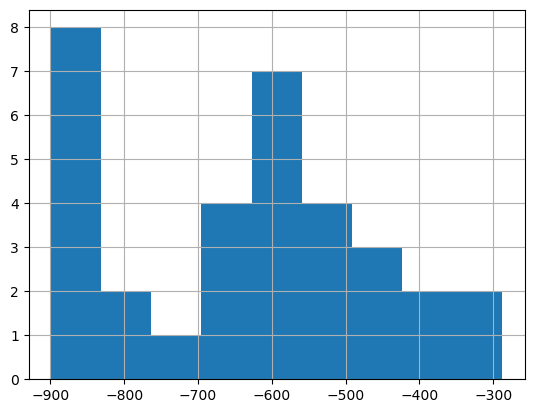

In [21]:
df.hu.hist(bins=9)

In [24]:
N = 5
kernel_mask = np.zeros((N,N,N))
kernel_mask[:,:,:] = 1
kernel_mask[N//2,N//2,N//2] = 0

kernel_idxs = np.vstack(np.where(kernel_mask == 1)) - np.array([[N//2],[N//2],[N//2]])

array([[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2,
        -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
         2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2],
       [-2, -2, -2, -2, -2, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  2,  2,  2,  2,  2, -2, -2, -2, -2, -2, -1, -1,
        -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,
         2,  2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1,  0,  0,  0,  0,
         1,  1,  1,  1,  1,  2,  2,  2,  2,  2, -2, -2, -2, -2, -2, -1,
        -1, -1, -1, -1,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,
       

-5 5


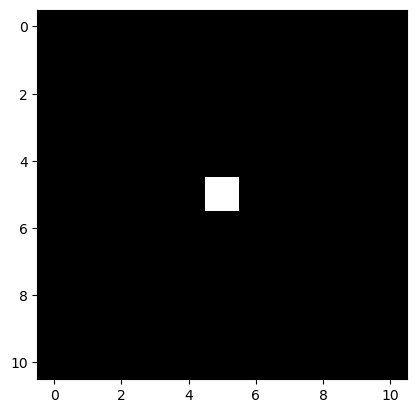

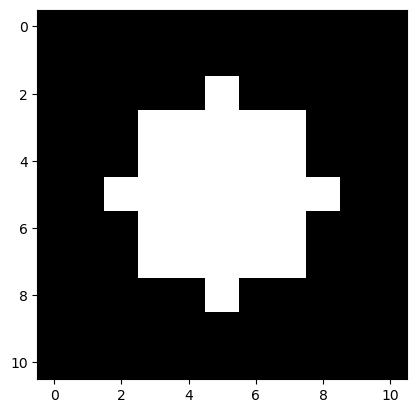

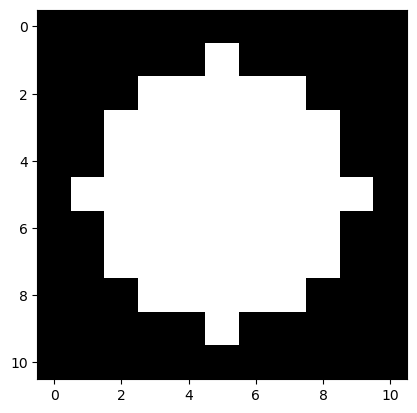

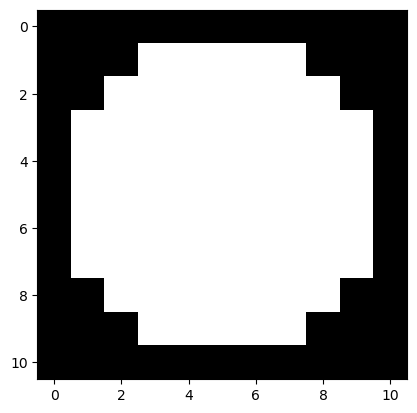

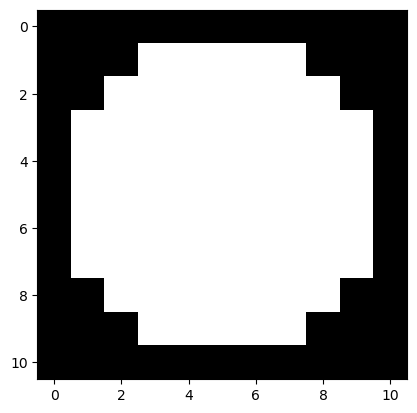

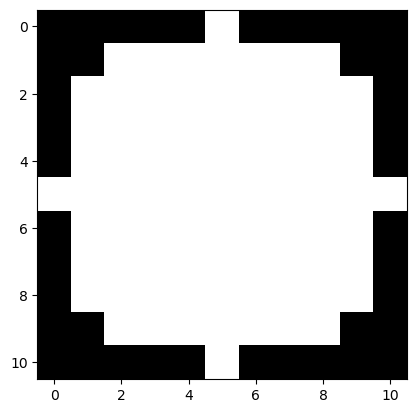

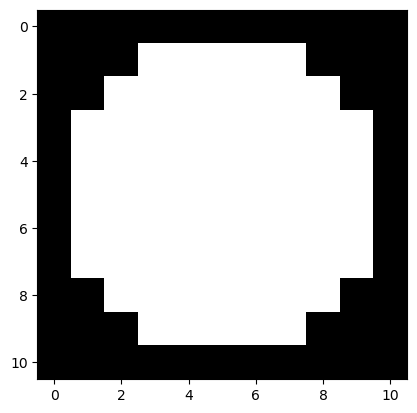

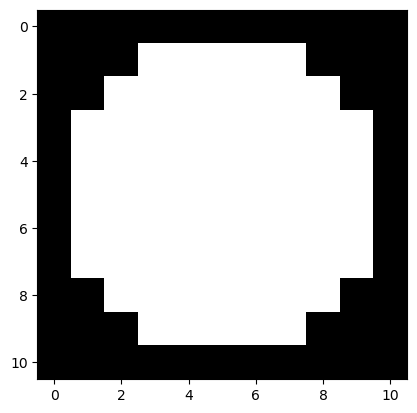

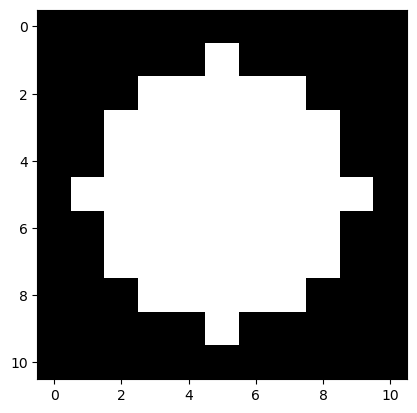

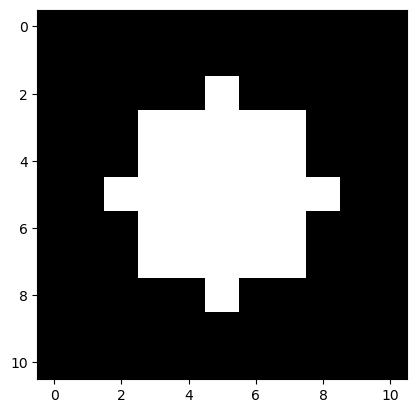

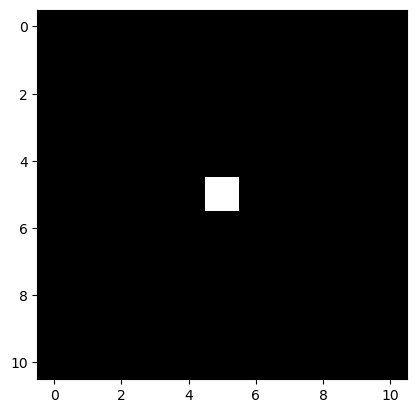

In [95]:
def circle_stupid(r):
    m = np.zeros((2*r+1,2*r+1,2*r+1))
    r2 = r*r
    m[(r+1)//2, (r+1)//2, (r+1)//2] = 1
    for k in range(0, m.shape[0]):
        for j in range(0, m.shape[1]):
            for i in range(0, m.shape[2]):
            
                if (k-r)**2 + (j-r)**2 + (i-r)**2 <= r2:
                    m[k,j,i] = 1
    return m

def create_kernel_idx(arr):
    N = arr.shape[0]
    return np.vstack(np.where(arr == 1)) - np.array([[N//2],[N//2],[N//2]])

R = 5
kernel_mask = circle_stupid(R)
kernel_idxs = create_kernel_idx(kernel_mask)
print(kernel_idxs.min(), kernel_idxs.max())
for i in range(len(kernel_mask)):
    plt.imshow(kernel_mask[:,:,i], 'gray')
    plt.show()

[[0]
 [0]
 [0]]
33


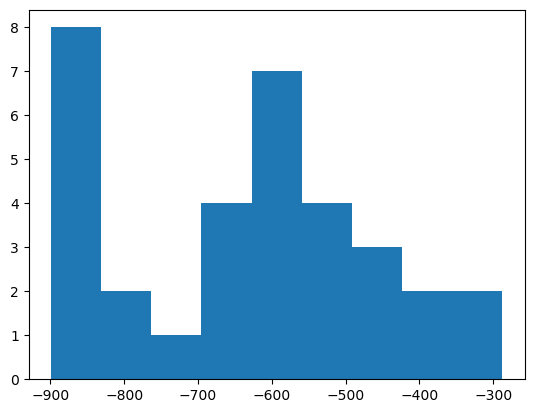

In [97]:
R = 0
kernel_mask = circle_stupid(R)
kernel_idxs = create_kernel_idx(kernel_mask)
kernel_idxs.shape

print(kernel_idxs)

hu_list = []
for index, row in df.iterrows():
    # print(row.i)
    k,j,i = row.k, row.j, row.i
    # print(len(kernel_idxs))
    for ki in range(kernel_idxs.shape[1]):
        nk,nj,ni = np.array((k,j,i)) + kernel_idxs[:,ki]
        hu_list.append(v_arr[nk,nj,ni])
    
print(len(hu_list))
plt.hist(hu_list, bins=9)
plt.show()
 

(array([ 12.,  43.,  68.,  89., 111., 133., 129., 144., 178., 100.,  21.,
         14.,  15.,   9.,   3.,   5.,   2.,   1.,   6.,   0.,   0.,   5.,
          0.,   0.,   1.]),
 array([-1000.  ,  -894.32,  -788.64,  -682.96,  -577.28,  -471.6 ,
         -365.92,  -260.24,  -154.56,   -48.88,    56.8 ,   162.48,
          268.16,   373.84,   479.52,   585.2 ,   690.88,   796.56,
          902.24,  1007.92,  1113.6 ,  1219.28,  1324.96,  1430.64,
         1536.32,  1642.  ]),
 <BarContainer object of 25 artists>)

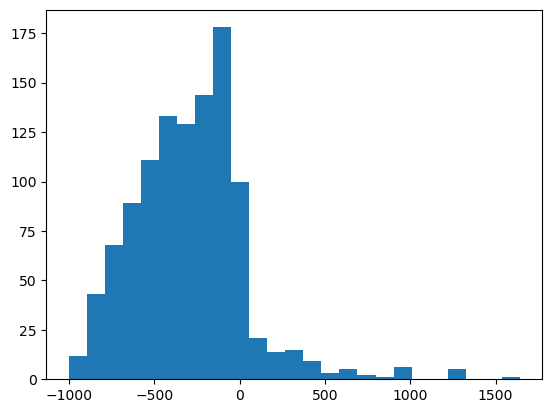

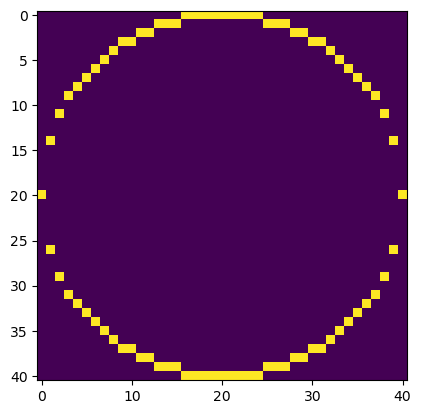

In [40]:
# public void circleSimple(int xCenter, int yCenter, int radius, Color c)
#     {
#         int pix = c.getRGB();
#         int x, y, r2;
        
#         r2 = radius * radius;
#         for (x = -radius; x <= radius; x++) {
#             y = (int) (Math.sqrt(r2 - x*x) + 0.5);
#             raster.setPixel(pix, xCenter + x, yCenter + y);
#             raster.setPixel(pix, xCenter + x, yCenter - y);
#         }
#     }

def circleSimple(r):
    r2 = r*r
    mid = r
    m = np.zeros((2*r+1,2*r+1))
    for x in range(-r, r+1):
        y = int(math.sqrt(r2-x*x) + 0.5)
        m[r+y, r+x] = 1
        m[r-y, r+x] = 1
        
    return m

plt.imshow(circleSimple(20))
        

(37, 3)


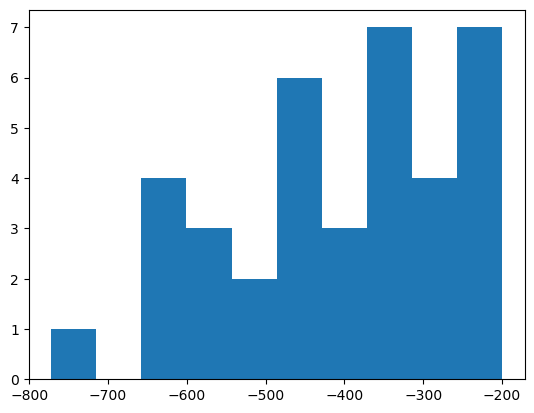

In [105]:
print(full_path.shape)
hu_list = []
for i in range(len(full_path)):
    posk, posj, posi = full_path[i,:]
    hu_list.append(v_arr[posk, posj, posi])

plt.hist(hu_list, bins=10)
plt.show()
    


(array([1.5337300e+07, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.1131301e+07, 4.5651420e+06, 3.4010410e+06, 1.2471682e+07,
        1.3800300e+07, 9.3158700e+05, 2.1390200e+05, 1.1239600e+05,
        6.3777000e+04, 4.5151000e+04, 1.5743000e+04, 2.7800000e+02]),
 array([-3024. , -2774.8, -2525.6, -2276.4, -2027.2, -1778. , -1528.8,
        -1279.6, -1030.4,  -781.2,  -532. ,  -282.8,   -33.6,   215.6,
          464.8,   714. ,   963.2,  1212.4,  1461.6,  1710.8,  1960. ]),
 <BarContainer object of 20 artists>)

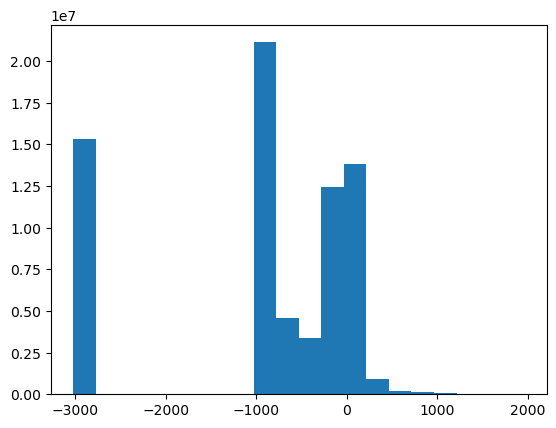

In [109]:
plt.hist(v_arr.flatten(), bins=20)

In [11]:
caldet1 = np.load('../data/pda/grindpeak_caldet.npy')

In [12]:
df = pd.DataFrame(caldet1.flatten())
df.describe()

,0
count,7.208960e+07
mean,3.598110e+00
std,3.503847e+01
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,1.922000e+03


In [5]:
df = df.loc[~(df.iloc[:,0] == 0)]

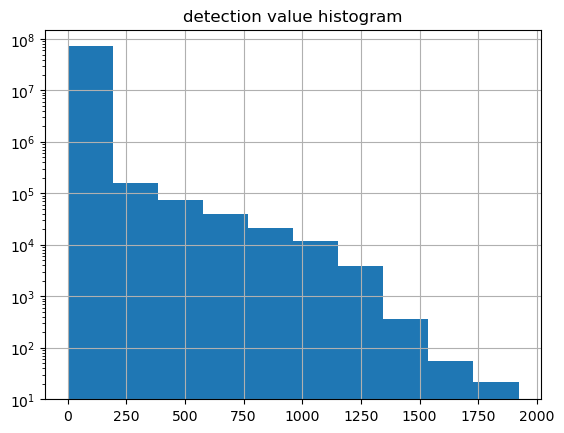

In [13]:
df.hist()
plt.yscale('log')
plt.title('detection value histogram')
plt.show()